#**Load the Data**

In [ ]:
import pandas as pd



In [ ]:

df = pd.read_csv("/content/smiles_2d_descriptors.tsv" , sep='\t')

In [ ]:
df.head()

,Molecule ChEMBL ID,Smiles,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,FpDensityMorgan1,BCUT2D_MWHI,...,fr_aryl_methyl,fr_bicyclic,fr_ether,fr_halogen,fr_methoxy,fr_oxazole,fr_para_hydroxylation,fr_pyridine,fr_sulfide,Label
0,CHEMBL121,CN(CCOc1ccc(CC2SC(=O)NC2=O)cc1)c1ccccn1,12.395462,0.266925,-3.989477,0.820855,33.120000,357.435,1.440000,32.166729,...,0,0,1,0,0,0,0,1,1,1
1,CHEMBL595,CCc1ccc(CCOc2ccc(CC3SC(=O)NC3=O)cc2)nc1,12.390339,0.260928,-3.836992,0.825254,34.480000,356.447,1.360000,32.166729,...,1,0,1,0,0,0,0,1,1,1
2,CHEMBL59132,Cc1oc(-c2ccccc2)nc1CCOc1ccc(CC2SC(=O)NC2=O)cc1,12.461054,0.266071,-3.890868,0.632040,30.827586,408.479,1.310345,32.166729,...,2,0,1,0,0,1,0,0,1,1
3,CHEMBL4127972,O=C1NC(=O)C(Cc2ccc(OCCOC(c3ccccc3)c3ccccc3)cc2)S1,12.526541,0.300905,-4.242887,0.492837,30.838710,433.529,1.000000,32.166729,...,0,0,2,0,0,0,0,0,1,1
4,CHEMBL4293295,CCc1ccc([C@H](O)COc2ccc(CC3SC(=O)NC3=O)cc2)nc1,12.412590,0.270522,-3.904701,0.776778,35.461538,372.446,1.500000,32.166729,...,0,0,1,0,0,0,0,1,1,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4285 entries, 0 to 4284
Columns: 106 entries, Molecule ChEMBL ID to Label
dtypes: float64(70), int64(34), object(2)
memory usage: 3.5+ MB


In [ ]:
df.shape

(4285, 106)

#**Drop Chembl id and Smiles**

In [ ]:
# Drop the columns
df = df.drop(columns= ['Molecule ChEMBL ID' , 'Smiles'])

# View first 5 rows to confirm
df.head()

,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,FpDensityMorgan1,BCUT2D_MWHI,BCUT2D_MWLOW,BCUT2D_CHGHI,...,fr_aryl_methyl,fr_bicyclic,fr_ether,fr_halogen,fr_methoxy,fr_oxazole,fr_para_hydroxylation,fr_pyridine,fr_sulfide,Label
0,12.395462,0.266925,-3.989477,0.820855,33.120000,357.435,1.440000,32.166729,10.097756,2.308381,...,0,0,1,0,0,0,0,1,1,1
1,12.390339,0.260928,-3.836992,0.825254,34.480000,356.447,1.360000,32.166729,10.097277,2.308333,...,1,0,1,0,0,0,0,1,1,1
2,12.461054,0.266071,-3.890868,0.632040,30.827586,408.479,1.310345,32.166729,10.097382,2.308732,...,2,0,1,0,0,1,0,0,1,1
3,12.526541,0.300905,-4.242887,0.492837,30.838710,433.529,1.000000,32.166729,10.014988,2.308831,...,0,0,2,0,0,0,0,0,1,1
4,12.412590,0.270522,-3.904701,0.776778,35.461538,372.446,1.500000,32.166729,10.096733,2.308712,...,0,0,1,0,0,0,0,1,1,1


#**Data splitting as X and y**

In [ ]:
# Features (all columns except the target 'Label')
X = df.drop(columns=['Label'])

# Target
y = df['Label']

# Check shapes
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (4285, 103)
y shape: (4285,)


#**Data Split - 60 & 40**

In [ ]:
from sklearn.model_selection import train_test_split

# Stratified split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)


#**Model Building**

##**Random Forest**

###**Import the model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

###**Define the model**

In [ ]:
# Define RF with class_weight='balanced' for imbalanced dataset
rf = RandomForestClassifier(random_state=42, class_weight='balanced_subsample')

###**Training the model**

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced_subsample', random_state=42)

###**Applying the model to make Prediction**

In [ ]:
# Predict on training and test data
y_rf_train_pred = rf.predict(X_train)
y_rf_test_pred = rf.predict(X_test)
#for predict probablities(auc roc score)
y_rf_train_prob = rf.predict_proba(X_train)[:, 1]   # positive class probability
y_rf_test_prob = rf.predict_proba(X_test)[:, 1]

###**Evaluation Metrics - f1, Precision, Recall**

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import roc_auc_score


rf_train_f1 = f1_score(y_train, y_rf_train_pred)
rf_test_f1 = f1_score(y_test, y_rf_test_pred)
rf_train_precision = precision_score(y_train, y_rf_train_pred)
rf_test_precision = precision_score(y_test, y_rf_test_pred)
rf_train_recall = recall_score(y_train, y_rf_train_pred)
rf_test_recall = recall_score(y_test, y_rf_test_pred)
rf_train_accuracy = accuracy_score(y_train, y_rf_train_pred)
rf_test_accuracy = accuracy_score(y_test, y_rf_test_pred)
rf_train_confusion = confusion_matrix(y_train, y_rf_train_pred, normalize='true')
rf_test_confusion = confusion_matrix(y_test, y_rf_test_pred, normalize='true')
rf_train_auc = roc_auc_score(y_train, y_rf_train_prob)
rf_test_auc = roc_auc_score(y_test, y_rf_test_prob)

In [ ]:
print('RF F1 (Train)        : ', rf_train_f1)
print('RF Precision (Train) : ', rf_train_precision)
print('RF Recall (Train)    : ', rf_train_recall)
print('RF F1 (Test)         : ', rf_test_f1)
print('RF Precision (Test)  : ', rf_test_precision)
print('RF Recall (Test)     : ', rf_test_recall)
print('RF Accuracy (Train)  : ', rf_train_accuracy)
print('RF Accuracy (Test)   : ', rf_test_accuracy)
print('RF Confusion (Train) : ', rf_train_confusion)
print('RF Confusion (Test)  : ', rf_test_confusion)
print('RF AUC (Train)       : ', rf_train_auc)
print('RF AUC (Test)        : ', rf_test_auc)


RF F1 (Train)        :  1.0
RF Precision (Train) :  1.0
RF Recall (Train)    :  1.0
RF F1 (Test)         :  0.6666666666666666
RF Precision (Test)  :  0.5833333333333334
RF Recall (Test)     :  0.7777777777777778
RF Accuracy (Train)  :  1.0
RF Accuracy (Test)   :  0.9959159859976663
RF Confusion (Train) :  [[1. 0.]
 [0. 1.]]
RF Confusion (Test)  :  [[0.99706745 0.00293255]
 [0.22222222 0.77777778]]
RF AUC (Train)       :  1.0
RF AUC (Test)        :  0.997882046269143


###**Final Results**

In [ ]:
rf_metrics_df = pd.DataFrame({
    'Method': ['Random Forest (d) ', 'Random Forest (d)'],
    'Dataset': ['Train', 'Test'],
    'Precision': [rf_train_precision, rf_test_precision],
    'Recall': [rf_train_recall, rf_test_recall],
    'F1 Score': [rf_train_f1, rf_test_f1],
    'Accuracy': [rf_train_accuracy, rf_test_accuracy],
    'Confusion Matrix': [rf_train_confusion, rf_test_confusion],
    'AUC': [rf_train_auc, rf_test_auc]
})

rf_metrics_df

,Method,Dataset,Precision,Recall,F1 Score,Accuracy,Confusion Matrix,AUC
0,Random Forest (d),Train,1.000000,1.000000,1.000000,1.000000,"[[1.0, 0.0], [0.0, 1.0]]",1.000000
1,Random Forest (d),Test,0.583333,0.777778,0.666667,0.995916,"[[0.9970674486803519, 0.002932551319648094], [...",0.997882


In [ ]:
#raw result of confusion matrix
rf_train_confusion_raw = confusion_matrix(y_train, y_rf_train_pred)
rf_test_confusion_raw = confusion_matrix(y_test, y_rf_test_pred)

print('RF Confusion (Train) : ', rf_train_confusion_raw)
print('RF Confusion (Test)  : ', rf_test_confusion_raw)

RF Confusion (Train) :  [[2557    0]
 [   0   14]]
RF Confusion (Test)  :  [[1700    5]
 [   2    7]]


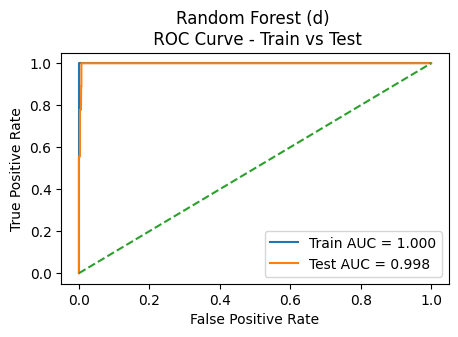

In [ ]:
#plot the roc auc curve
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Train probabilities
y_rf_train_prob = rf.predict_proba(X_train)[:, 1]
fpr_train, tpr_train, _ = roc_curve(y_train, y_rf_train_prob)
auc_train = roc_auc_score(y_train, y_rf_train_prob)

# Test probabilities
y_rf_test_prob = rf.predict_proba(X_test)[:, 1]
fpr_test, tpr_test, _ = roc_curve(y_test, y_rf_test_prob)
auc_test = roc_auc_score(y_test, y_rf_test_prob)

# Plot
plt.figure(figsize=(5,3))
plt.plot(fpr_train, tpr_train, label=f"Train AUC = {auc_train:.3f}")
plt.plot(fpr_test, tpr_test, label=f"Test AUC = {auc_test:.3f}")
plt.plot([0,1], [0,1], linestyle="--")


plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest (d) \n ROC Curve - Train vs Test")
plt.legend()
plt.show()

###**Hyperparameter Tuning**

In [ ]:
#to see the hyperpara names in random forest
rf._get_param_names()

['bootstrap',
 'ccp_alpha',
 'class_weight',
 'criterion',
 'max_depth',
 'max_features',
 'max_leaf_nodes',
 'max_samples',
 'min_impurity_decrease',
 'min_samples_leaf',
 'min_samples_split',
 'min_weight_fraction_leaf',
 'monotonic_cst',
 'n_estimators',
 'n_jobs',
 'oob_score',
 'random_state',
 'verbose',
 'warm_start']

In [ ]:

param_grid = {
    "n_estimators": [100, 200, 300],
    "max_features": ["sqrt", "log2"],
    "max_depth": [2, 5, 15],
    "min_samples_leaf": [1, 2, 5],
    "min_samples_split": [2, 5],
    "bootstrap": [True, False]
}

In [ ]:
#using the stratified k fold cross validation for imbalanced class

from sklearn.model_selection import StratifiedKFold, GridSearchCV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
#run the grid search and fit on train data with 5 fold
rf_grid = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=cv,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=2
)

rf_grid.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(class_weight='balanced_subsample',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 5, 15],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='roc_auc', verbose=2)

In [ ]:
#to get the best hyper para combination
rf_grid.best_params_

{'bootstrap': True,
 'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 100}

In [ ]:
print(rf_grid.best_score_)

0.9979138637475538


In [ ]:
# Assuming best_rf holds the dictionary of best parameters from rf_grid.best_params_
# The original model `rf` was defined with random_state and class_weight

# Reinitialize the Random Forest model with the best parameters and original settings
best_rf_model = RandomForestClassifier(random_state=42, class_weight='balanced_subsample', **rf_grid.best_params_)

# Fit this new model to the training data
best_rf_model.fit(X_train, y_train)

# Predict on train and test data using the newly fitted model
y_rf_hyper_train_pred = best_rf_model.predict(X_train)
y_rf_hyper_test_pred = best_rf_model.predict(X_test)
# for predict probabilities (auc roc score)
y_rf_hyper_train_prob = best_rf_model.predict_proba(X_train)[:, 1]
y_rf_hyper_test_prob = best_rf_model.predict_proba(X_test)[:, 1]

In [ ]:
rf_hyper_train_f1 = f1_score(y_train, y_rf_hyper_train_pred)
rf_hyper_test_f1 = f1_score(y_test, y_rf_hyper_test_pred)
rf_hyper_train_precision = precision_score(y_train, y_rf_hyper_train_pred)
rf_hyper_test_precision = precision_score(y_test, y_rf_hyper_test_pred)
rf_hyper_train_recall = recall_score(y_train, y_rf_hyper_train_pred)
rf_hyper_test_recall = recall_score(y_test, y_rf_hyper_test_pred)
rf_hyper_train_accuracy = accuracy_score(y_train, y_rf_hyper_train_pred)
rf_hyper_test_accuracy = accuracy_score(y_test, y_rf_hyper_test_pred)
rf_hyper_train_confusion = confusion_matrix(y_train, y_rf_hyper_train_pred, normalize='true')
rf_hyper_test_confusion = confusion_matrix(y_test, y_rf_hyper_test_pred, normalize='true')
rf_hyper_train_auc = roc_auc_score(y_train, y_rf_hyper_train_prob)
rf_hyper_test_auc = roc_auc_score(y_test, y_rf_hyper_test_prob)

In [ ]:
print('RF hyper F1 (Train)        : ', rf_hyper_train_f1)
print('RF hyper Precision (Train) : ', rf_hyper_train_precision)
print('RF hyper Recall (Train)    : ', rf_hyper_train_recall)
print('RF hyper F1 (Test)         : ', rf_hyper_test_f1)
print('RF hyper Precision (Test)  : ', rf_hyper_test_precision)
print('RF hyper Recall (Test)     : ', rf_hyper_test_recall)
print('RF hyper Accuracy (Train)  : ', rf_hyper_train_accuracy)
print('RF hyper Accuracy (Test)   : ', rf_hyper_test_accuracy)
print('RF hyper Confusion (Train) : ', rf_hyper_train_confusion)
print('RF hyper Confusion (Test)  : ', rf_hyper_test_confusion)
print('RF hyper AUC (Train)       : ', rf_hyper_train_auc)
print('RF hyper AUC (Test)        : ', rf_hyper_test_auc)


RF hyper F1 (Train)        :  0.7777777777777778
RF hyper Precision (Train) :  0.6363636363636364
RF hyper Recall (Train)    :  1.0
RF hyper F1 (Test)         :  0.5714285714285714
RF hyper Precision (Test)  :  0.42105263157894735
RF hyper Recall (Test)     :  0.8888888888888888
RF hyper Accuracy (Train)  :  0.9968883702839362
RF hyper Accuracy (Test)   :  0.9929988331388565
RF hyper Confusion (Train) :  [[0.99687133 0.00312867]
 [0.         1.        ]]
RF hyper Confusion (Test)  :  [[0.99354839 0.00645161]
 [0.11111111 0.88888889]]
RF hyper AUC (Train)       :  0.9993575060059221
RF hyper AUC (Test)        :  0.997979797979798


In [ ]:
rf_hyperpara_metrics_df = pd.DataFrame({
    'Method': ['Random Forest Hyperpara(d)', 'Random Forest Hyperpara(d)'],
    'Dataset': ['Train', 'Test'],
    'Precision': [rf_hyper_train_precision, rf_hyper_test_precision],
    'Recall': [rf_hyper_train_recall, rf_hyper_test_recall],
    'F1 Score': [rf_hyper_train_f1, rf_hyper_test_f1],
    'Accuracy': [rf_hyper_train_accuracy, rf_hyper_test_accuracy],
    'Confusion Matrix': [rf_hyper_train_confusion, rf_hyper_test_confusion],
    'AUC': [rf_hyper_train_auc, rf_hyper_test_auc]
})

rf_hyperpara_metrics_df

,Method,Dataset,Precision,Recall,F1 Score,Accuracy,Confusion Matrix,AUC
0,Random Forest Hyperpara(d),Train,0.636364,1.000000,0.777778,0.996888,"[[0.9968713335940556, 0.003128666405944466], [...",0.999358
1,Random Forest Hyperpara(d),Test,0.421053,0.888889,0.571429,0.992999,"[[0.9935483870967742, 0.0064516129032258064], ...",0.997980


In [ ]:
#raw result of confusion matrix
rf_hyper_train_confusion_raw = confusion_matrix(y_train, y_rf_hyper_train_pred)
rf_hyper_test_confusion_raw = confusion_matrix(y_test, y_rf_hyper_test_pred)

print('RF hyper Confusion (Train) : ', rf_hyper_train_confusion_raw)
print('RF hyper Confusion (Test)  : ', rf_hyper_test_confusion_raw)

RF hyper Confusion (Train) :  [[2549    8]
 [   0   14]]
RF hyper Confusion (Test)  :  [[1694   11]
 [   1    8]]


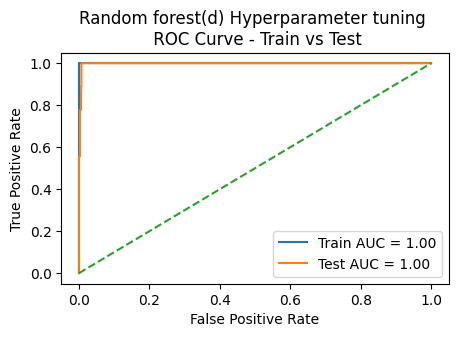

In [ ]:
#plot the roc auc curve
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Train probabilities
y_rf_hyper_train_prob = rf.predict_proba(X_train)[:, 1]
fpr_train, tpr_train, _ = roc_curve(y_train, y_rf_hyper_train_prob)
auc_train = roc_auc_score(y_train, y_rf_hyper_train_prob)

# Test probabilities
y_rf_hyper_test_prob = rf.predict_proba(X_test)[:, 1]
fpr_test, tpr_test, _ = roc_curve(y_test, y_rf_hyper_test_prob)
auc_test = roc_auc_score(y_test, y_rf_hyper_test_prob)

# Plot
plt.figure(figsize=(5,3))
plt.plot(fpr_train, tpr_train, label=f"Train AUC = {auc_train:.2f}")
plt.plot(fpr_test, tpr_test, label=f"Test AUC = {auc_test:.2f}")
plt.plot([0,1], [0,1], linestyle="--")


plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random forest(d) Hyperparameter tuning \n ROC Curve - Train vs Test")
plt.legend()
plt.show()

##**XGBoost**

###**Import the model**

In [ ]:
from xgboost import XGBClassifier

###**Define the model**

In [ ]:
# Calculate scale_pos_weight for imbalanced data
neg = (y_train == 0).sum()
pos = (y_train == 1).sum()
spw = neg / pos
print("scale_pos_weight:", spw)

#Define the model
xgb = XGBClassifier(objective='binary:logistic', eval_metric='logloss', scale_pos_weight=spw, random_state=42)

scale_pos_weight: 182.64285714285714


###**Train the model**

In [ ]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

###**Applying the model to make prediction**

In [ ]:
y_xgb_train_pred = xgb.predict(X_train)
y_xgb_test_pred = xgb.predict(X_test)
#for predict probablities(auc roc score)
y_xgb_train_prob = xgb.predict_proba(X_train)[:, 1]   # positive class probability
y_xgb_test_prob = xgb.predict_proba(X_test)[:, 1]


###**Evaluation Metrics**

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import roc_auc_score



xgb_train_f1 = f1_score(y_train, y_xgb_train_pred)
xgb_test_f1 = f1_score(y_test, y_xgb_test_pred)
xgb_train_precision = precision_score(y_train, y_xgb_train_pred)
xgb_test_precision = precision_score(y_test, y_xgb_test_pred)
xgb_train_recall = recall_score(y_train, y_xgb_train_pred)
xgb_test_recall = recall_score(y_test, y_xgb_test_pred)
xgb_train_accuracy = accuracy_score(y_train, y_xgb_train_pred)
xgb_test_accuracy = accuracy_score(y_test, y_xgb_test_pred)
xgb_train_confusion = confusion_matrix(y_train, y_xgb_train_pred, normalize='true')
xgb_test_confusion = confusion_matrix(y_test, y_xgb_test_pred, normalize='true')
xgb_train_auc = roc_auc_score(y_train, y_xgb_train_prob)
xgb_test_auc = roc_auc_score(y_test, y_xgb_test_prob)


In [ ]:
print('XGB F1 (Train)        : ', xgb_train_f1)
print('XGB Precision (Train) : ', xgb_train_precision)
print('XGB Recall (Train)    : ', xgb_train_recall)
print('XGB F1 (Test)         : ', xgb_test_f1)
print('XGB Precision (Test)  : ', xgb_test_precision)
print('XGB Recall (Test)     : ', xgb_test_recall)
print('XGB Accuracy (Train)  : ',  xgb_train_accuracy)
print('XGB Accuracy (Test)   : ',  xgb_test_accuracy)
print('XGB Confusion (Train) : ',  xgb_train_confusion)
print('XGB Confusion (Test)  : ',  xgb_test_confusion)
print('XGB AUC (Train)       : ',  xgb_train_auc)
print('XGB AUC (Test)        : ',  xgb_test_auc)


XGB F1 (Train)        :  1.0
XGB Precision (Train) :  1.0
XGB Recall (Train)    :  1.0
XGB F1 (Test)         :  0.6666666666666666
XGB Precision (Test)  :  0.5333333333333333
XGB Recall (Test)     :  0.8888888888888888
XGB Accuracy (Train)  :  1.0
XGB Accuracy (Test)   :  0.9953325554259043
XGB Confusion (Train) :  [[1. 0.]
 [0. 1.]]
XGB Confusion (Test)  :  [[0.99589443 0.00410557]
 [0.11111111 0.88888889]]
XGB AUC (Train)       :  1.0
XGB AUC (Test)        :  0.9990876507005539


###**Final Results**

In [ ]:
xgb_metrics_df = pd.DataFrame({
    'Method': ['Extreme Gradient Boosting(d)', 'Extreme Gradient Boosting(d)'],
    'Dataset': ['Train', 'Test'],
    'Precision': [xgb_train_precision, xgb_test_precision],
    'Recall': [xgb_train_recall, xgb_test_recall],
    'F1 Score': [xgb_train_f1, xgb_test_f1],
    'Accuracy': [xgb_train_accuracy, xgb_test_accuracy],
    'Confusion Matrix': [xgb_train_confusion, xgb_test_confusion],
    'AUC': [xgb_train_auc, xgb_test_auc]
})

xgb_metrics_df

,Method,Dataset,Precision,Recall,F1 Score,Accuracy,Confusion Matrix,AUC
0,Extreme Gradient Boosting(d),Train,1.000000,1.000000,1.000000,1.000000,"[[1.0, 0.0], [0.0, 1.0]]",1.000000
1,Extreme Gradient Boosting(d),Test,0.533333,0.888889,0.666667,0.995333,"[[0.9958944281524926, 0.004105571847507331], [...",0.999088


In [ ]:
#raw result of confusion matrix
xgb_train_confusion_raw = confusion_matrix(y_train, y_xgb_train_pred)
xgb_test_confusion_raw = confusion_matrix(y_test, y_xgb_test_pred)

print('XGB Confusion (Train) : ', xgb_train_confusion_raw)
print('XGB Confusion (Test)  : ', xgb_test_confusion_raw)


XGB Confusion (Train) :  [[2557    0]
 [   0   14]]
XGB Confusion (Test)  :  [[1698    7]
 [   1    8]]


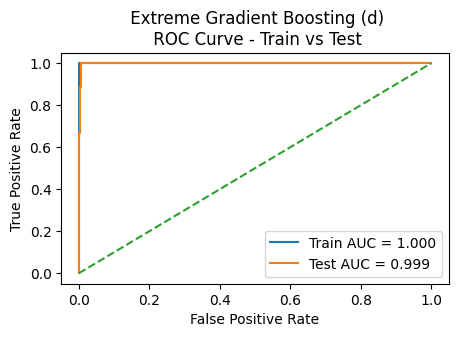

In [ ]:
#plot the roc auc curve
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Train probabilities
y_xgb_train_prob = xgb.predict_proba(X_train)[:, 1]
fpr_train, tpr_train, _ = roc_curve(y_train, y_xgb_train_prob)
auc_train = roc_auc_score(y_train, y_xgb_train_prob)

# Test probabilities
y_xgb_test_prob = xgb.predict_proba(X_test)[:, 1]
fpr_test, tpr_test, _ = roc_curve(y_test, y_xgb_test_prob)
auc_test = roc_auc_score(y_test, y_xgb_test_prob)

# Plot
plt.figure(figsize=(5,3))
plt.plot(fpr_train, tpr_train, label=f"Train AUC = {auc_train:.3f}")
plt.plot(fpr_test, tpr_test, label=f"Test AUC = {auc_test:.3f}")
plt.plot([0,1], [0,1], linestyle="--")


plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(" Extreme Gradient Boosting (d)\n ROC Curve - Train vs Test")
plt.legend()
plt.show()

###**Hyperparameter Tuning**

In [ ]:
#to see the hyperpara names in random forest
xgb.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': 'logloss',
 'feature_types': None,
 'feature_weights': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': 42,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': np.float64(182.64285714285714),
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [ ]:
#define the param grid
param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [3, 5],
    "learning_rate": [0.05, 0.1],
    "subsample": [0.8],
    "colsample_bytree": [0.8]
}

In [ ]:
#using the stratified k fold cross validation for imbalanced class

from sklearn.model_selection import StratifiedKFold, GridSearchCV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
#run the grid search and fit on train data with 5 fold
xgb_grid = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=cv,
    scoring='roc_auc', # Changed 'auc_roc' to 'roc_auc'
    n_jobs=-1,
    verbose=2
)

xgb_grid.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8],
                         'learning_rate': [0.05, 0.1], 'max_depth': [3, 5],
                         'n_estimators': [100, 200], 'subsample': [0.8]},
             scoring='roc_auc', verbose=2)

In [ ]:
#to get the best hyper para combination
xgb_grid.best_params_

{'colsample_bytree': 0.8,
 'learning_rate': 0.05,
 'max_depth': 5,
 'n_estimators': 200,
 'subsample': 0.8}

In [ ]:
print(xgb_grid.best_score_)

0.9960873797292891


In [ ]:
 #Assuming best_xgb holds the dictionary of best parameters from xgb_grid.best_params_
# The original model `xgb` was defined with random_state and scale_pos_weight

# Reinitialize the Extreme gradient boosting model with the best parameters and original settings
best_xgb_model =  XGBClassifier(objective='binary:logistic', eval_metric='logloss', scale_pos_weight=spw, random_state=42, **xgb_grid.best_params_)

# Fit this new model to the training data
best_xgb_model.fit(X_train, y_train)

# Predict on train and test data using the newly fitted model
y_xgb_hyper_train_pred = best_xgb_model.predict(X_train)
y_xgb_hyper_test_pred = best_xgb_model.predict(X_test)
# for predict probabilities (auc roc score)
y_xgb_hyper_train_prob = best_xgb_model.predict_proba(X_train)[:, 1]
y_xgb_hyper_test_prob = best_xgb_model.predict_proba(X_test)[:, 1]

In [ ]:
xgb_hyper_train_f1 = f1_score(y_train, y_xgb_hyper_train_pred)
xgb_hyper_test_f1 = f1_score(y_test, y_xgb_hyper_test_pred)
xgb_hyper_train_precision = precision_score(y_train, y_xgb_hyper_train_pred)
xgb_hyper_test_precision = precision_score(y_test, y_xgb_hyper_test_pred)
xgb_hyper_train_recall = recall_score(y_train, y_xgb_hyper_train_pred)
xgb_hyper_test_recall = recall_score(y_test, y_xgb_hyper_test_pred)
xgb_hyper_train_accuracy = accuracy_score(y_train, y_xgb_hyper_train_pred)
xgb_hyper_test_accuracy = accuracy_score(y_test, y_xgb_hyper_test_pred)
xgb_hyper_train_confusion = confusion_matrix(y_train, y_xgb_hyper_train_pred, normalize='true')
xgb_hyper_test_confusion = confusion_matrix(y_test, y_xgb_hyper_test_pred, normalize='true')
xgb_hyper_train_auc = roc_auc_score(y_train, y_xgb_hyper_train_prob)
xgb_hyper_test_auc = roc_auc_score(y_test, y_xgb_hyper_test_prob)

In [ ]:
print('XGB hyper F1 (Train)        : ', xgb_hyper_train_f1)
print('XGB hyper Precision (Train) : ', xgb_hyper_train_precision)
print('XGB hyper Recall (Train)    : ', xgb_hyper_train_recall)
print('XGB hyper F1 (Test)         : ', xgb_hyper_test_f1)
print('XGB hyper Precision (Test)  : ', xgb_hyper_test_precision)
print('XGB hyper Recall (Test)     : ', xgb_hyper_test_recall)
print('XGB hyper Accuracy (Train)  : ', xgb_hyper_train_accuracy)
print('XGB hyper Accuracy (Test)   : ', xgb_hyper_test_accuracy)
print('XGB hyper Confusion (Train) : ', xgb_hyper_train_confusion)
print('XGB hyper Confusion (Test)  : ', xgb_hyper_test_confusion)
print('XGB hyper AUC (Train)       : ', xgb_hyper_train_auc)
print('XGB hyper AUC (Test)        : ', xgb_hyper_test_auc)

XGB hyper F1 (Train)        :  0.9655172413793104
XGB hyper Precision (Train) :  0.9333333333333333
XGB hyper Recall (Train)    :  1.0
XGB hyper F1 (Test)         :  0.72
XGB hyper Precision (Test)  :  0.5625
XGB hyper Recall (Test)     :  1.0
XGB hyper Accuracy (Train)  :  0.999611046285492
XGB hyper Accuracy (Test)   :  0.9959159859976663
XGB hyper Confusion (Train) :  [[9.99608917e-01 3.91083301e-04]
 [0.00000000e+00 1.00000000e+00]]
XGB hyper Confusion (Test)  :  [[0.99589443 0.00410557]
 [0.         1.        ]]
XGB hyper AUC (Train)       :  1.0
XGB hyper AUC (Test)        :  0.9990876507005539


In [ ]:
import pandas as pd
xgb_hyperpara_metrics_df = pd.DataFrame({
    'Method': ['Extreme Gradient Boosting Hyperpara(d)', 'Extreme Gradient Boosting Hyperpara(d)'],
    'Dataset': ['Train', 'Test'],
    'Precision': [xgb_hyper_train_precision, xgb_hyper_test_precision],
    'Recall': [xgb_hyper_train_recall, xgb_hyper_test_recall],
    'F1 Score': [xgb_hyper_train_f1, xgb_hyper_test_f1],
    'Accuracy': [xgb_hyper_train_accuracy, xgb_hyper_test_accuracy],
    'Confusion Matrix': [xgb_hyper_train_confusion, xgb_hyper_test_confusion],
    'AUC': [xgb_hyper_train_auc, xgb_hyper_test_auc]
})

xgb_hyperpara_metrics_df

,Method,Dataset,Precision,Recall,F1 Score,Accuracy,Confusion Matrix,AUC
0,Extreme Gradient Boosting Hyperpara(d),Train,0.933333,1.0,0.965517,0.999611,"[[0.9996089166992569, 0.00039108330074305825],...",1.000000
1,Extreme Gradient Boosting Hyperpara(d),Test,0.562500,1.0,0.720000,0.995916,"[[0.9958944281524926, 0.004105571847507331], [...",0.999088


In [ ]:
#raw result of confusion matrix
xgb_hyper_train_confusion_raw = confusion_matrix(y_train, y_xgb_hyper_train_pred)
xgb_hyper_test_confusion_raw = confusion_matrix(y_test, y_xgb_hyper_test_pred)

print('XGB hyper Confusion (Train) : ', xgb_hyper_train_confusion_raw)
print('XGB hyper Confusion (Test)  : ', xgb_hyper_test_confusion_raw)

XGB hyper Confusion (Train) :  [[2556    1]
 [   0   14]]
XGB hyper Confusion (Test)  :  [[1698    7]
 [   0    9]]


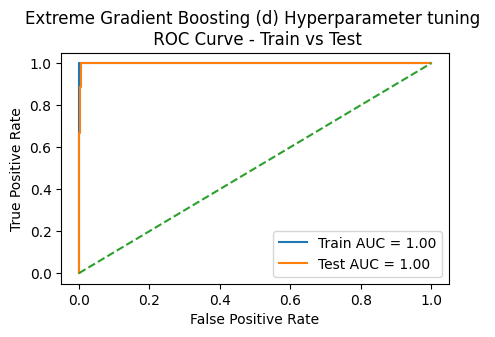

In [ ]:
#plot the roc auc curve
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Train probabilities
y_xgb_hyper_train_prob = xgb.predict_proba(X_train)[:, 1]
fpr_train, tpr_train, _ = roc_curve(y_train, y_xgb_hyper_train_prob)
auc_train = roc_auc_score(y_train, y_xgb_hyper_train_prob)

# Test probabilities
y_xgb_hyper_test_prob = xgb.predict_proba(X_test)[:, 1]
fpr_test, tpr_test, _ = roc_curve(y_test, y_xgb_hyper_test_prob)
auc_test = roc_auc_score(y_test, y_xgb_hyper_test_prob)

# Plot
plt.figure(figsize=(5,3))
plt.plot(fpr_train, tpr_train, label=f"Train AUC = {auc_train:.2f}")
plt.plot(fpr_test, tpr_test, label=f"Test AUC = {auc_test:.2f}")
plt.plot([0,1], [0,1], linestyle="--")


plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Extreme Gradient Boosting (d) Hyperparameter tuning \n ROC Curve - Train vs Test")
plt.legend()
plt.show()

##**Support Vector Machine**

###**Import the model**

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE


###**Define the model**

In [ ]:
#normalizing the data using minmax scaler
scaler = MinMaxScaler()
X_train_svc_scaled = scaler.fit_transform(X_train)
X_test_svc_scaled = scaler.transform(X_test)

#define the model
svc = SVC(class_weight='balanced', random_state=42, probability=True)

#linear rfe feature selection
svc_linear = SVC(kernel='linear', class_weight='balanced', probability=True, random_state=42)
rfe = RFE(estimator=svc_linear, n_features_to_select=20)

#trained to get best features
X_train_rfe = rfe.fit_transform(X_train_svc_scaled, y_train)
X_test_rfe  = rfe.transform(X_test_svc_scaled)



In [ ]:
selected_features = X_train.columns[rfe.support_]
print(selected_features)

Index(['MaxAbsEStateIndex', 'qed', 'PEOE_VSA12', 'PEOE_VSA4', 'PEOE_VSA5',
       'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8', 'SlogP_VSA1', 'SlogP_VSA5',
       'EState_VSA2', 'VSA_EState3', 'VSA_EState4', 'VSA_EState6',
       'NumAmideBonds', 'NumHeterocycles', 'NumUnspecifiedAtomStereoCenters',
       'fr_halogen', 'fr_methoxy', 'fr_pyridine'],
      dtype='object')


In [ ]:
print("Number of selected features:", len(selected_features))

Number of selected features: 20


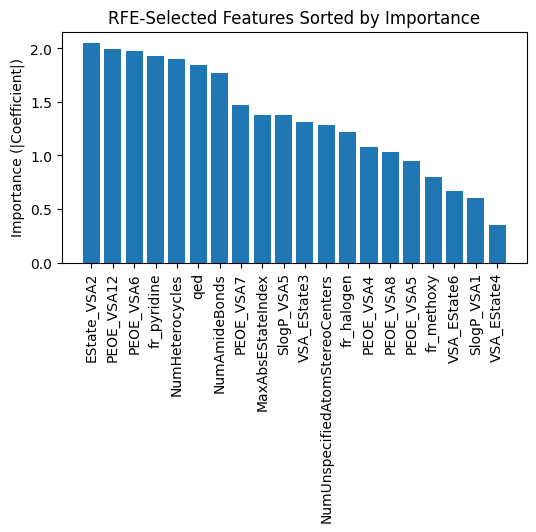

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Names & coefficients
features = X_train.columns[rfe.support_]
coef = rfe.estimator_.coef_[0]

# Sort descending
sorted_idx = np.argsort(abs(coef))[::-1]

plt.figure(figsize=(6,3))
plt.bar(features[sorted_idx], abs(coef[sorted_idx]))
plt.xticks(rotation=90)
plt.ylabel("Importance (|Coefficient|)")
plt.title("RFE-Selected Features Sorted by Importance")
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu

# -----------------------------
# INPUT DATA (already with you)
# -----------------------------
# X = descriptor dataframe (103 features)
# y = target (0 = inactive, 1 = active)
# top20_features = list of 20 selected descriptors from RFE

# -----------------------------
# STEP 1: Create working dataframe
# -----------------------------
df = X[selected_features].copy()
df['Class'] = y.values   # 0 = Inactive, 1 = Active

# -----------------------------
# STEP 2: Mean value per class
# -----------------------------
feature_class_mean = df.groupby('Class').mean().T

# Rename columns properly
feature_class_mean.columns = ['Inactive_Mean', 'Active_Mean']


# -----------------------------
# STEP 3: Mean Difference
# -----------------------------
feature_class_mean['Mean_Difference'] = (
    feature_class_mean['Active_Mean'] - feature_class_mean['Inactive_Mean']
)

# -----------------------------
# STEP 4: Dominant Class
# -----------------------------
feature_class_mean['Dominant_Class'] = np.where(
    feature_class_mean['Mean_Difference'] > 0,
    'Active',
    'Inactive'
)

# -----------------------------
# STEP 5: Mann–Whitney U Test (p-values)
# -----------------------------
pvals = []

for feat in selected_features:
    active_vals = df[df['Class'] == 1][feat]
    inactive_vals = df[df['Class'] == 0][feat]

    p = mannwhitneyu(active_vals, inactive_vals, alternative='two-sided').pvalue
    pvals.append(p)

feature_class_mean['p_value'] = pvals

# -----------------------------
# STEP 6: Sort by statistical importance (optional)
# -----------------------------
final_table = feature_class_mean.sort_values(by='p_value')

# -----------------------------
# STEP 7: Save to tsv (optional but recommended)
# -----------------------------
final_table.to_csv("Top20_Descriptor_Interpretation.tsv", sep='\t') # Changed to_excel to to_csv and added sep='\t'

# -----------------------------
# OUTPUT
# -----------------------------
print(final_table)

                                 Inactive_Mean  Active_Mean  Mean_Difference  \
NumAmideBonds                         0.416237     2.000000         1.583763   
EState_VSA2                           3.805243    18.576105        14.770862   
PEOE_VSA12                            2.508277     6.857073         4.348796   
VSA_EState3                           3.173078    -4.011570        -7.184648   
fr_pyridine                           0.099484     0.565217         0.465734   
NumUnspecifiedAtomStereoCenters       0.312529     1.043478         0.730949   
VSA_EState4                          -7.170011    -2.932899         4.237112   
qed                                   0.406207     0.648557         0.242350   
SlogP_VSA5                           68.543613    44.008110       -24.535503   
NumHeterocycles                       1.047396     1.826087         0.778691   
MaxAbsEStateIndex                    13.439910    12.488473        -0.951437   
PEOE_VSA7                            55.

In [ ]:
df=pd.read_csv("Top20_Descriptor_Interpretation.tsv", sep='\t')
df

,Unnamed: 0,Inactive_Mean,Active_Mean,Mean_Difference,Dominant_Class,p_value
0,NumAmideBonds,0.416237,2.000000,1.583763,Active,1.107492e-19
1,EState_VSA2,3.805243,18.576105,14.770862,Active,1.417680e-17
2,PEOE_VSA12,2.508277,6.857073,4.348796,Active,2.491072e-15
3,VSA_EState3,3.173078,-4.011570,-7.184648,Inactive,2.900360e-14
4,fr_pyridine,0.099484,0.565217,0.465734,Active,1.223375e-13
5,NumUnspecifiedAtomStereoCenters,0.312529,1.043478,0.730949,Active,1.290742e-12
6,VSA_EState4,-7.170011,-2.932899,4.237112,Active,1.098992e-09
7,qed,0.406207,0.648557,0.242350,Active,1.958525e-08
8,SlogP_VSA5,68.543613,44.008110,-24.535503,Inactive,7.274203e-08
9,NumHeterocycles,1.047396,1.826087,0.778691,Active,7.461207e-08


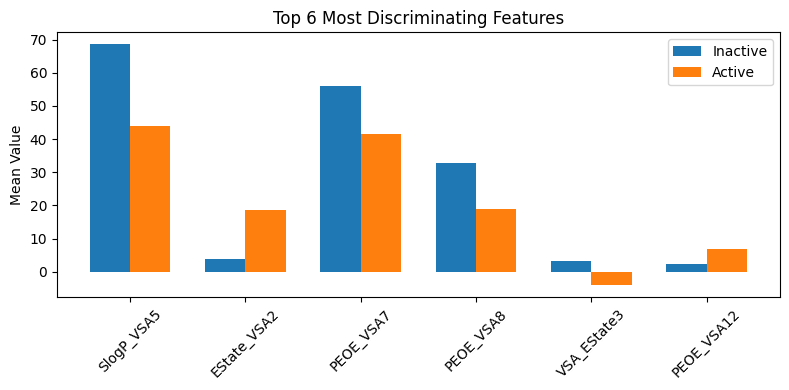

In [ ]:
df["diff"] = abs(df["Active_Mean"] - df["Inactive_Mean"])

df_selected = df.sort_values("diff", ascending=False).head(6)


active_means = df_selected["Active_Mean"]
inactive_means = df_selected["Inactive_Mean"]

x = np.arange(len(df_selected)) # Changed from len(features) to len(df_selected)
width = 0.35

plt.figure(figsize=(8,4))
plt.bar(x - width/2, inactive_means, width, label="Inactive")
plt.bar(x + width/2, active_means, width, label="Active")

plt.xticks(x, df_selected["Unnamed: 0"], rotation=45) # Changed from features to df_selected["Unnamed: 0"]
plt.ylabel("Mean Value")
plt.title("Top 6 Most Discriminating Features")
plt.legend()
plt.tight_layout()
plt.show()

###**Train the model**

In [ ]:
# old svc.fit(X_train_svc_scaled, y_train)
#train
svc_rbf = SVC(kernel='rbf', class_weight='balanced', probability=True, random_state=42)
svc_rbf.fit(X_train_rfe, y_train)

SVC(class_weight='balanced', probability=True, random_state=42)

###**Applying the model to make prediction**

In [ ]:
y_svc_train_pred = svc_rbf.predict(X_train_rfe)
y_svc_test_pred = svc_rbf.predict(X_test_rfe)
#for predict probablities(auc roc score)
y_svc_train_prob = svc_rbf.predict_proba(X_train_rfe)[:, 1]   # positive class probability
y_svc_test_prob = svc_rbf.predict_proba(X_test_rfe)[:, 1]



###**Evaluation Metrics**

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import roc_auc_score



svc_train_f1 = f1_score(y_train, y_svc_train_pred)
svc_test_f1 = f1_score(y_test, y_svc_test_pred)
svc_train_precision = precision_score(y_train, y_svc_train_pred)
svc_test_precision = precision_score(y_test, y_svc_test_pred)
svc_train_recall = recall_score(y_train, y_svc_train_pred)
svc_test_recall = recall_score(y_test, y_svc_test_pred)
svc_train_accuracy = accuracy_score(y_train, y_svc_train_pred)
svc_test_accuracy = accuracy_score(y_test, y_svc_test_pred)
svc_train_confusion = confusion_matrix(y_train, y_svc_train_pred, normalize='true')
svc_test_confusion = confusion_matrix(y_test, y_svc_test_pred, normalize='true')
svc_train_auc = roc_auc_score(y_train, y_svc_train_prob)
svc_test_auc = roc_auc_score(y_test, y_svc_test_prob)

In [ ]:
print('SVc F1 (Train)        : ', svc_train_f1)
print('SVc Precision (Train) : ', svc_train_precision)
print('SVc Recall (Train)    : ', svc_train_recall)
print('SVc F1 (Test)         : ', svc_test_f1)
print('SVc Precision (Test)  : ', svc_test_precision)
print('SVc Recall (Test)     : ', svc_test_recall)
print('SVc Accuracy (Train)  : ', svc_train_accuracy)
print('SVc Accuracy (Test)   : ', svc_test_accuracy)
print('SVc Confusion (Train) : ', svc_train_confusion)
print('SVc Confusion (Test)  : ', svc_test_confusion)
print('SVc AUC (Train)       : ', svc_train_auc)
print('SVc AUC (Test)        : ', svc_test_auc)



SVc F1 (Train)        :  0.7368421052631579
SVc Precision (Train) :  0.5833333333333334
SVc Recall (Train)    :  1.0
SVc F1 (Test)         :  0.4
SVc Precision (Test)  :  0.25806451612903225
SVc Recall (Test)     :  0.8888888888888888
SVc Accuracy (Train)  :  0.9961104628549202
SVc Accuracy (Test)   :  0.9859976662777129
SVc Confusion (Train) :  [[0.99608917 0.00391083]
 [0.         1.        ]]
SVc Confusion (Test)  :  [[0.98651026 0.01348974]
 [0.11111111 0.88888889]]
SVc AUC (Train)       :  0.9993295714844403
SVc AUC (Test)        :  0.9965461062235256


###**Final Results**

In [ ]:
svc_metrics_df = pd.DataFrame({
    'Method': ['Support Vector(d)', 'Support Vector(d)'],
    'Dataset': ['Train', 'Test'],
    'Precision': [svc_train_precision, svc_test_precision],
    'Recall': [svc_train_recall, svc_test_recall],
    'F1 Score': [svc_train_f1, svc_test_f1],
    'Accuracy': [svc_train_accuracy, svc_test_accuracy],
    'Confusion Matrix': [svc_train_confusion, svc_test_confusion],
    'AUC': [svc_train_auc, svc_test_auc]

})

svc_metrics_df

,Method,Dataset,Precision,Recall,F1 Score,Accuracy,Confusion Matrix,AUC
0,Support Vector(d),Train,0.583333,1.000000,0.736842,0.996110,"[[0.9960891669925694, 0.003910833007430583], [...",0.999330
1,Support Vector(d),Test,0.258065,0.888889,0.400000,0.985998,"[[0.9865102639296187, 0.013489736070381233], [...",0.996546


In [ ]:
#raw result of confusion matrix
svc_train_confusion_raw = confusion_matrix(y_train, y_svc_train_pred)
svc_test_confusion_raw = confusion_matrix(y_test, y_svc_test_pred)

print('SVc Confusion (Train) : ', svc_train_confusion_raw)
print('SVc Confusion (Test)  : ', svc_test_confusion_raw)

SVc Confusion (Train) :  [[2547   10]
 [   0   14]]
SVc Confusion (Test)  :  [[1682   23]
 [   1    8]]


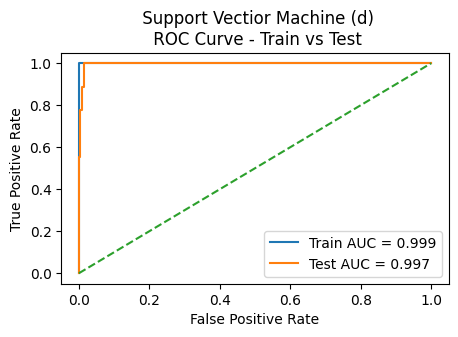

In [ ]:
#plot the roc auc curve
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Train probabilities
y_svc_train_prob = svc_rbf.predict_proba(X_train_rfe)[:, 1]
fpr_train, tpr_train, _ = roc_curve(y_train, y_svc_train_prob)
auc_train = roc_auc_score(y_train, y_svc_train_prob)

# Test probabilities
y_svc_test_prob = svc_rbf.predict_proba(X_test_rfe)[:, 1]
fpr_test, tpr_test, _ = roc_curve(y_test, y_svc_test_prob)
auc_test = roc_auc_score(y_test, y_svc_test_prob)

# Plot
plt.figure(figsize=(5,3))
plt.plot(fpr_train, tpr_train, label=f"Train AUC = {auc_train:.3f}")
plt.plot(fpr_test, tpr_test, label=f"Test AUC = {auc_test:.3f}")
plt.plot([0,1], [0,1], linestyle="--")


plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(" Support Vectior Machine (d)\n ROC Curve - Train vs Test")
plt.legend()
plt.show()

###**Hyperparameter Tuning**

In [ ]:
#to see the hyperpara names in support vector machine
svc._get_param_names()

['C',
 'break_ties',
 'cache_size',
 'class_weight',
 'coef0',
 'decision_function_shape',
 'degree',
 'gamma',
 'kernel',
 'max_iter',
 'probability',
 'random_state',
 'shrinking',
 'tol',
 'verbose']

In [ ]:
#define param grid
param_grid = {
    'C': [0.1, 1, 10, 50, 100],
    'gamma': ['scale', 0.01, 0.001, 0.0001],
    'kernel': ['rbf', 'linear'],
}




In [ ]:
#using the stratified k fold cross validation for imbalanced class

from sklearn.model_selection import StratifiedKFold, GridSearchCV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
#run the grid search and fit on train data with 5 fold
svc_grid = GridSearchCV(
    estimator=svc,
    param_grid=param_grid,
    cv=cv,
    scoring='roc_auc', # Changed 'auc_roc' to 'roc_auc'
    n_jobs=-1,
    verbose=2
)

svc_grid.fit(X_train_rfe, y_train)


Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=SVC(class_weight='balanced', probability=True,
                           random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 50, 100],
                         'gamma': ['scale', 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear']},
             scoring='roc_auc', verbose=2)

In [ ]:
#to get the best hyper para combination
svc_grid.best_params_

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

In [ ]:
print(svc_grid.best_score_)

0.9989575689008479


In [ ]:
# Assuming best_svc holds the dictionary of best parameters from svc_grid.best_params_
# The original model `svc` was defined with random_state and class_weight

# Reinitialize the Support Vector model with the best parameters and original settings
best_svc_model = SVC(class_weight='balanced', random_state=42, probability=True, **svc_grid.best_params_)

# Fit this new model to the training data
best_svc_model.fit(X_train_rfe, y_train)

# Predict on train and test data using the newly fitted model
y_svc_hyper_train_pred = best_svc_model.predict(X_train_rfe )
y_svc_hyper_test_pred = best_svc_model.predict(X_test_rfe)
# for predict probabilities (auc roc score)
y_svc_hyper_train_prob = best_svc_model.predict_proba(X_train_rfe)[:, 1]
y_svc_hyper_test_prob = best_svc_model.predict_proba(X_test_rfe)[:, 1]

In [ ]:
svc_hyper_train_f1 = f1_score(y_train, y_svc_hyper_train_pred)
svc_hyper_test_f1 = f1_score(y_test, y_svc_hyper_test_pred)
svc_hyper_train_precision = precision_score(y_train, y_svc_hyper_train_pred)
svc_hyper_test_precision = precision_score(y_test, y_svc_hyper_test_pred)
svc_hyper_train_recall = recall_score(y_train, y_svc_hyper_train_pred)
svc_hyper_test_recall = recall_score(y_test, y_svc_hyper_test_pred)
svc_hyper_train_accuracy = accuracy_score(y_train, y_svc_hyper_train_pred)
svc_hyper_test_accuracy = accuracy_score(y_test, y_svc_hyper_test_pred)
svc_hyper_train_confusion = confusion_matrix(y_train, y_svc_hyper_train_pred, normalize='true')
svc_hyper_test_confusion = confusion_matrix(y_test, y_svc_hyper_test_pred, normalize='true')
svc_hyper_train_auc = roc_auc_score(y_train, y_svc_hyper_train_prob)
svc_hyper_test_auc = roc_auc_score(y_test, y_svc_hyper_test_prob)

In [ ]:
print('SVc hyper F1 (Train)        : ', svc_hyper_train_f1)
print('SVc hyper Precision (Train) : ', svc_hyper_train_precision)
print('SVc hyper Recall (Train)    : ', svc_hyper_train_recall)
print('SVc hyper F1 (Test)         : ', svc_hyper_test_f1)
print('SVc hyper Precision (Test)  : ', svc_hyper_test_precision)
print('SVc hyper Recall (Test)     : ', svc_hyper_test_recall)
print('SVc hyper Accuracy (Train)  : ', svc_hyper_train_accuracy)
print('SVc hyper Accuracy (Test)   : ', svc_hyper_test_accuracy)
print('SVc hyper Confusion (Train) : ', svc_hyper_train_confusion)
print('SVc hyper Confusion (Test)  : ', svc_hyper_test_confusion)
print('SVc hyper AUC (Train)       : ', svc_hyper_train_auc)
print('SVc hyper AUC (Test)        : ', svc_hyper_test_auc)

SVc hyper F1 (Train)        :  0.8484848484848485
SVc hyper Precision (Train) :  0.7368421052631579
SVc hyper Recall (Train)    :  1.0
SVc hyper F1 (Test)         :  0.5185185185185185
SVc hyper Precision (Test)  :  0.3888888888888889
SVc hyper Recall (Test)     :  0.7777777777777778
SVc hyper Accuracy (Train)  :  0.9980552314274601
SVc hyper Accuracy (Test)   :  0.9924154025670945
SVc hyper Confusion (Train) :  [[0.99804458 0.00195542]
 [0.         1.        ]]
SVc hyper Confusion (Test)  :  [[0.99354839 0.00645161]
 [0.22222222 0.77777778]]
SVc hyper AUC (Train)       :  0.9994413095703671
SVc hyper AUC (Test)        :  0.9962854349951125


In [ ]:
import pandas as pd
svc_hyperpara_metrics_df = pd.DataFrame({
    'Method': ['Support Vector Hyperpara (d)', 'Support Vector Hyperpara (d)'],
    'Dataset': ['Train', 'Test'],
    'Precision': [svc_hyper_train_precision, svc_hyper_test_precision],
    'Recall': [svc_hyper_train_recall, svc_hyper_test_recall],
    'F1 Score': [svc_hyper_train_f1, svc_hyper_test_f1],
    'Accuracy': [svc_hyper_train_accuracy, svc_hyper_test_accuracy],
    'Confusion Matrix': [svc_hyper_train_confusion, svc_hyper_test_confusion],
    'AUC': [svc_hyper_train_auc, svc_hyper_test_auc]
})

svc_hyperpara_metrics_df

,Method,Dataset,Precision,Recall,F1 Score,Accuracy,Confusion Matrix,AUC
0,Support Vector Hyperpara (d),Train,0.736842,1.000000,0.848485,0.998055,"[[0.9980445834962847, 0.0019554165037152915], ...",0.999441
1,Support Vector Hyperpara (d),Test,0.388889,0.777778,0.518519,0.992415,"[[0.9935483870967742, 0.0064516129032258064], ...",0.996285


In [ ]:
#raw result of confusion matrix
svc_hyper_train_confusion_raw = confusion_matrix(y_train, y_svc_hyper_train_pred)
svc_hyper_test_confusion_raw = confusion_matrix(y_test, y_svc_hyper_test_pred)

print('SVc hyper Confusion (Train) : ', svc_hyper_train_confusion_raw)
print('SVc hyper Confusion (Test)  : ', svc_hyper_test_confusion_raw)


SVc hyper Confusion (Train) :  [[2552    5]
 [   0   14]]
SVc hyper Confusion (Test)  :  [[1694   11]
 [   2    7]]


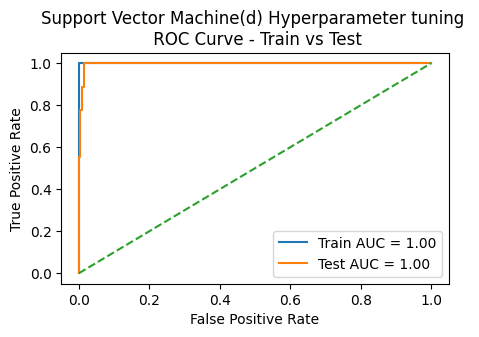

In [ ]:
#plot the roc auc curve
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Train probabilities
y_svc_hyper_train_prob = svc_rbf.predict_proba(X_train_rfe)[:, 1]
fpr_train, tpr_train, _ = roc_curve(y_train, y_svc_hyper_train_prob)
auc_train = roc_auc_score(y_train, y_svc_hyper_train_prob)

# Test probabilities
y_svc_hyper_test_prob = svc_rbf.predict_proba(X_test_rfe)[:, 1]
fpr_test, tpr_test, _ = roc_curve(y_test, y_svc_hyper_test_prob)
auc_test = roc_auc_score(y_test, y_svc_hyper_test_prob)

# Plot
plt.figure(figsize=(5,3))
plt.plot(fpr_train, tpr_train, label=f"Train AUC = {auc_train:.2f}")
plt.plot(fpr_test, tpr_test, label=f"Test AUC = {auc_test:.2f}")
plt.plot([0,1], [0,1], linestyle="--")


plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Support Vector Machine(d) Hyperparameter tuning \n ROC Curve - Train vs Test")
plt.legend()
plt.show()

 **SVC 103 descriptors (default hyperpara)**

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler




In [ ]:
#normalizing the data using minmax scaler
scaler = MinMaxScaler()
X_train_svc_scaled = scaler.fit_transform(X_train)
X_test_svc_scaled = scaler.transform(X_test)

#define the model
svc = SVC(class_weight='balanced', random_state=42, probability=True)

In [ ]:
svc.fit(X_train_svc_scaled, y_train)

SVC(class_weight='balanced', probability=True, random_state=42)

In [ ]:
y_svc_train_all_pred = svc.predict(X_train_svc_scaled)
y_svc_test_all_pred = svc.predict(X_test_svc_scaled)
#for predict probablities(auc roc score)
y_svc_train_all_prob = svc.predict_proba(X_train_svc_scaled)[:, 1]   # positive class probability
y_svc_test_all_prob = svc.predict_proba(X_test_svc_scaled)[:, 1]


In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import roc_auc_score



svc_train_all_f1 = f1_score(y_train, y_svc_train_all_pred)
svc_test_all_f1 = f1_score(y_test, y_svc_test_all_pred)
svc_train_all_precision = precision_score(y_train, y_svc_train_all_pred)
svc_test_all_precision = precision_score(y_test, y_svc_test_all_pred)
svc_train_all_recall = recall_score(y_train, y_svc_train_all_pred)
svc_test_all_recall = recall_score(y_test, y_svc_test_all_pred)
svc_train_all_accuracy = accuracy_score(y_train, y_svc_train_all_pred)
svc_test_all_accuracy = accuracy_score(y_test, y_svc_test_all_pred)
svc_train_all_confusion = confusion_matrix(y_train, y_svc_train_all_pred, normalize='true')
svc_test_all_confusion = confusion_matrix(y_test, y_svc_test_all_pred, normalize='true')
svc_train_all_auc = roc_auc_score(y_train, y_svc_train_all_prob)
svc_test_all_auc = roc_auc_score(y_test, y_svc_test_all_prob)

In [ ]:
print('SVc all F1 (Train)        : ', svc_train_all_f1)
print('SVc all Precision (Train) : ', svc_train_all_precision)
print('SVc all Recall (Train)    : ', svc_train_all_recall)
print('SVc all F1 (Test)         : ', svc_test_all_f1)
print('SVc all Precision (Test)  : ', svc_test_all_precision)
print('SVc all Recall (Test)     : ', svc_test_all_recall)
print('SVc all Accuracy (Train)  : ', svc_train_all_accuracy)
print('SVc all Accuracy (Test)   : ', svc_test_all_accuracy)
print('SVc all Confusion (Train) : ', svc_train_all_confusion)
print('SVc all Confusion (Test)  : ', svc_test_all_confusion)
print('SVc all AUC (Train)       : ', svc_train_all_auc)
print('SVc all AUC (Test)        : ', svc_test_all_auc)


SVc all F1 (Train)        :  0.6363636363636364
SVc all Precision (Train) :  0.4666666666666667
SVc all Recall (Train)    :  1.0
SVc all F1 (Test)         :  0.47368421052631576
SVc all Precision (Test)  :  0.3103448275862069
SVc all Recall (Test)     :  1.0
SVc all Accuracy (Train)  :  0.9937767405678725
SVc all Accuracy (Test)   :  0.9883313885647608
SVc all Confusion (Train) :  [[0.99374267 0.00625733]
 [0.         1.        ]]
SVc all Confusion (Test)  :  [[0.98826979 0.01173021]
 [0.         1.        ]]
SVc all AUC (Train)       :  0.9991898988770321
SVc all AUC (Test)        :  0.9971326164874551


In [ ]:
svc_all_metrics_df = pd.DataFrame({
    'Method': ['Support Vector all (d)', 'Support Vector all(d)'],
    'Dataset': ['Train', 'Test'],
    'Precision': [svc_train_all_precision, svc_test_all_precision],
    'Recall': [svc_train_all_recall, svc_test_all_recall],
    'F1 Score': [svc_train_all_f1, svc_test_all_f1],
    'Accuracy': [svc_train_all_accuracy, svc_test_all_accuracy],
    'Confusion Matrix': [svc_train_all_confusion, svc_test_all_confusion],
    'AUC': [svc_train_all_auc, svc_test_all_auc]

})

svc_all_metrics_df

,Method,Dataset,Precision,Recall,F1 Score,Accuracy,Confusion Matrix,AUC
0,Support Vector all (d),Train,0.466667,1.0,0.636364,0.993777,"[[0.9937426671881111, 0.006257332811888932], [...",0.999190
1,Support Vector all(d),Test,0.310345,1.0,0.473684,0.988331,"[[0.9882697947214076, 0.011730205278592375], [...",0.997133


In [ ]:
#raw result of confusion matrix
svc_train_all_confusion_raw = confusion_matrix(y_train, y_svc_train_all_pred)
svc_test_all_confusion_raw = confusion_matrix(y_test, y_svc_test_all_pred)

print('SVc all Confusion (Train) : ', svc_train_all_confusion_raw)
print('SVc all Confusion (Test)  : ', svc_test_all_confusion_raw)

SVc all Confusion (Train) :  [[2541   16]
 [   0   14]]
SVc all Confusion (Test)  :  [[1685   20]
 [   0    9]]


##**Final Comparison Table**

In [ ]:
final_fp_table = pd.concat([
    rf_metrics_df[rf_metrics_df["Dataset"] == "Test"].assign(Method="RF Default"),
    rf_hyperpara_metrics_df[rf_hyperpara_metrics_df["Dataset"] == "Test"].assign(Method="RF Tuned"),
    xgb_metrics_df[xgb_metrics_df["Dataset"] == "Test"].assign(Method="XGB Default"),
    xgb_hyperpara_metrics_df[xgb_hyperpara_metrics_df["Dataset"] == "Test"].assign(Method="XGB Tuned"),
    svc_metrics_df[svc_metrics_df["Dataset"] == "Test"].assign(Method="SVC Default"),
    svc_hyperpara_metrics_df[svc_hyperpara_metrics_df["Dataset"] == "Test"].assign(Method="SVC Tuned")
], ignore_index=True)

final_fp_table = final_fp_table[["Method", "Precision", "Recall", "F1 Score", "Accuracy", "AUC"]]

display(final_fp_table)

,Method,Precision,Recall,F1 Score,Accuracy,AUC
0,RF Default,0.583333,0.777778,0.666667,0.995916,0.997882
1,RF Tuned,0.421053,0.888889,0.571429,0.992999,0.997980
2,XGB Default,0.533333,0.888889,0.666667,0.995333,0.999088
3,XGB Tuned,0.562500,1.000000,0.720000,0.995916,0.999088
4,SVC Default,0.258065,0.888889,0.400000,0.985998,0.996546
5,SVC Tuned,0.388889,0.777778,0.518519,0.992415,0.996285


In [ ]:
final_fp_table = final_fp_table.round(3)
display(final_fp_table)


,Method,Precision,Recall,F1 Score,Accuracy,AUC
0,RF Default,0.583,0.778,0.667,0.996,0.998
1,RF Tuned,0.421,0.889,0.571,0.993,0.998
2,XGB Default,0.533,0.889,0.667,0.995,0.999
3,XGB Tuned,0.562,1.000,0.720,0.996,0.999
4,SVC Default,0.258,0.889,0.400,0.986,0.997
5,SVC Tuned,0.389,0.778,0.519,0.992,0.996
